# ANIMATION PLOT FSLE IN THE WIBUS

Script to plot animation ofFinite-size Lyapunov Fields in the West Iberia Upwelling System.

### 1. Modules

In [ ]:
import xarray as xr
import numpy as np
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from pandas import to_datetime
from matplotlib import animation
from IPython.display import HTML
import matplotlib.dates
import os
import glob

### 2. Data files

In [ ]:
## Data file header & tail
fFileHeader = "FSLE_WIbUS_"
fFileTail = ".nc"

## Year to plot
fYear = 2000

## Get file list from current folder
wDir = os.getcwd()
fFiles = sorted(glob.glob(wDir + "/" + fFileHeader + "{:d}".format(fYear) + "*" + fFileTail)) 

### 3. Plot data

/home/joao/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/joao/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolor(self, *args, **kwargs)
/home/joao/miniconda3/envs/py3_parcels/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:1665: MatplotlibDeprecationWarning: shading='flat' when X

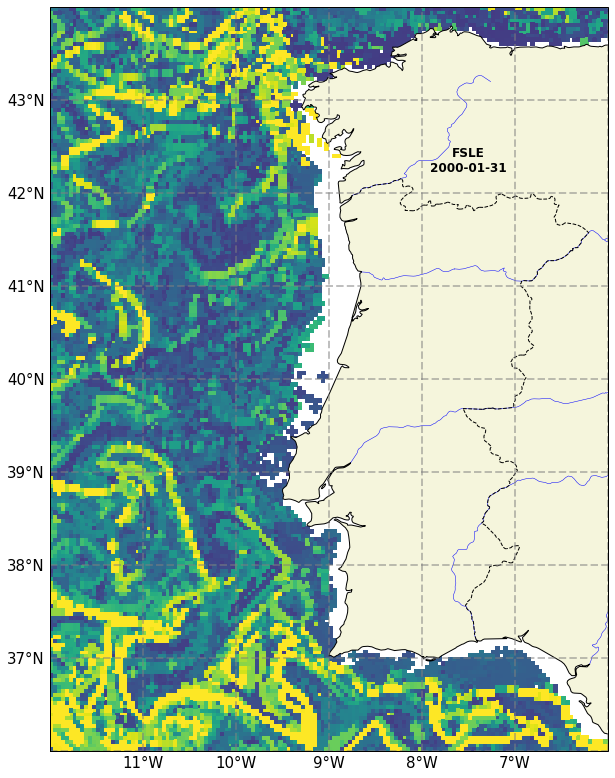

In [37]:
## Load FSLE grid data
fGridData = xr.open_dataset(fFiles[0]) # Load it from first data file

fGridLat = fGridData.latitude
fGridLon = fGridData.longitude

## Setup plot grid and limits

lonG, latG = np.meshgrid(fGridLon, fGridLat)

lonMin = lonG.min()
lonMax = lonG.max()
latMin = latG.min()
latMax = latG.max()

extent = [lonMin, lonMax, latMin, latMax]

# Plot fsle. (This will be a loop but for now we just want to check if it works)

fig = plt.figure(figsize=(10, 20))
#ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax = plt.axes(projection=ccrs.PlateCarree())


maps=[]

    #ax.coastlines('10m')
ax.set_extent(extent)
resol = '10m'  # use data at this scale
bodr = cfeature.NaturalEarthFeature(category='cultural', 
     name='admin_0_boundary_lines_land', scale=resol, facecolor='none', alpha=0.7)
land = cfeature.NaturalEarthFeature('physical', 'land', \
     scale=resol, edgecolor='k', facecolor=cfeature.COLORS['land'])
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', \
     scale=resol, edgecolor='none', facecolor=cfeature.COLORS['water'])
lakes = cfeature.NaturalEarthFeature('physical', 'lakes', \
     scale=resol, edgecolor='b', facecolor=cfeature.COLORS['water'])
rivers = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', \
     scale=resol, edgecolor='b', facecolor='none')

ax.add_feature(land, facecolor='beige')
#ax.add_feature(ocean, linewidth=0.2 )
ax.add_feature(lakes)
ax.add_feature(rivers, linewidth=0.5)
ax.add_feature(bodr, linestyle='--', edgecolor='k', alpha=1)

Ttransform = ccrs.PlateCarree()._as_mpl_transform(ax)
an=ax.annotate('FSLE\n'+to_datetime(str(fGridData.time[0].values)).strftime('%Y-%m-%d'), 
            xy=(-7.5, 42.5), xycoords=Ttransform,
            ha='center', va='top', fontsize='large', fontweight='bold')

#t=[an]
#pc=plt.pcolor(lonG, latG, fGridData.fsle[:,:,0], transform=ccrs.PlateCarree(), 
#                  vmin=0.0, vmax=0.12)#, cbar_kwargs={'orientation':'vertical','shrink':0.15})
#ax.add_feature(cfeature.LAND, edgecolor='black')
#ax.gridlines(draw_labels=True)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False
#gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-11, -10, -9, -8, -7])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15}#, 'color': 'gray'}
gl.ylabel_style = {'size': 15}#, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

def init():
    pc=ax.pcolor(lonG, latG, fGridData.fsle[:,:,0], transform=ccrs.PlateCarree(), 
                  vmin=0.0, vmax=0.12)#, cbar_kwargs={'orientation':'vertical','shrink':0.15})
    an=ax.annotate('FSLE\n',#+to_datetime(str(fGridData.time[0].values)).strftime('%Y-%m-%d'), 
            xy=(-7.5, 42.5), xycoords=Ttransform,
            ha='center', va='top', fontsize='large', fontweight='bold')
    
    return pc, an

def update(frame):
    #fsleData.plot
    #print(frame)
    pc=ax.pcolor(lonG, latG, fGridData.fsle[:,:,frame], transform=ccrs.PlateCarree(), 
                  vmin=0.0, vmax=0.12)#, cbar_kwargs={'orientation':'vertical','shrink':0.15})
    
    #an=ax.annotate('FSLE\n'+to_datetime(str(fGridData.time[frame].values)).strftime('%Y-%m-%d'), 
    #        xy=(-7.5, 42.5), xycoords=Ttransform,
    #        ha='center', va='top', fontsize='large', fontweight='bold')
    an.set_text('FSLE\n'+to_datetime(str(fGridData.time[frame].values)).strftime('%Y-%m-%d'))
    #maps.append(pc)
    #t.append(an)
    return pc, an
    #cb=plt.colorbar(pc,orientation='vertical',shrink=0.5)
    
    #plt.title(to_datetime(str(fGridData.time[0].values)).strftime('%Y-%m-%d'))

# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)    
    
# Plot animation
ani = animation.FuncAnimation(fig, update, frames=fGridData.time.size, blit=True)
                    #init_func=init, blit=True)

ani.save('FSLE_WIbUS_Jan2000.mp4', writer=writer)
#HTML(ani.to_jshtml())



#HTML(ani.to_html5_video())
#plt.show()

In [33]:
dir(pc)

['_A',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_checker',
 '_agg_filter',
 '_alias_map',
 '_alpha',
 '_animated',
 '_antialiaseds',
 '_axes',
 '_bcast_lwls',
 '_capstyle',
 '_check_update',
 '_clipon',
 '_clippath',
 '_contains',
 '_default_contains',
 '_edge_default',
 '_edgecolors',
 '_facecolors',
 '_factor',
 '_get_clipping_extent_bbox',
 '_gid',
 '_hatch',
 '_hatch_color',
 '_in_layout',
 '_is_filled',
 '_is_stroked',
 '_joinstyle',
 '_label',
 '_linestyles',
 '_linewidths',
 '_mouseover',
 '_offset_position',
 '_offsets',
 '_offsetsNone',
 '_oid',
 '_original_edgecolor',
 '_original_facecolor',
 '_path_effects',
 '_paths',
 '_picker'

In [26]:
range(1,3)

range(1, 3)